In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [ ]:
tf.random.set_seed(42)

In [ ]:
dataset_dir = "drive/MyDrive/dataset"  
img_size = (224, 224) 
batch_size = 32
num_classes = 15  
epochs = 20  

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  
    rotation_range=20,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2, 
    horizontal_flip=True,  
    validation_split=0.2  
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)


Found 1561 images belonging to 15 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  
)

Found 383 images belonging to 15 classes.


In [ ]:
print("Class Indices:", train_generator.class_indices)

Class Indices: {'Bear': 0, 'Bird': 1, 'Cat': 2, 'Cow': 3, 'Deer': 4, 'Dog': 5, 'Dolphin': 6, 'Elephant': 7, 'Giraffe': 8, 'Horse': 9, 'Kangaroo': 10, 'Lion': 11, 'Panda': 12, 'Tiger': 13, 'Zebra': 14}


In [ ]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),  
    include_top=False,  
    weights='imagenet' 
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = models.Sequential([
    base_model,  
    layers.GlobalAveragePooling2D(),  
    layers.Dense(512, activation='relu'),  
    layers.Dropout(0.5), 
    layers.Dense(num_classes, activation='softmax')  
])


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           7,695 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,921,551 (11.14 MB)

 Trainable params: 663,567 (2.53 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1023s 21s/step - accuracy: 0.1452 - loss: 2.9302 - val_accuracy: 0.5938 - val_loss: 1.8433
Epoch 2/20
 1/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5312 - loss: 1.8529

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


48/48 ━━━━━━━━━━━━━━━━━━━━ 44s 935ms/step - accuracy: 0.5312 - loss: 1.8529 - val_accuracy: 0.5682 - val_loss: 1.8332
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 69s 595ms/step - accuracy: 0.4764 - loss: 1.8277 - val_accuracy: 0.7131 - val_loss: 1.2979
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - accuracy: 0.6250 - loss: 1.3764 - val_accuracy: 0.7102 - val_loss: 1.2855
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 42s 811ms/step - accuracy: 0.6467 - loss: 1.3225 - val_accuracy: 0.7642 - val_loss: 1.0396
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7188 - loss: 1.1083 - val_accuracy: 0.7500 - val_loss: 1.0074
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 66s 583ms/step - accuracy: 0.7356 - loss: 0.9958 - val_accuracy: 0.7727 - val_loss: 0.8606
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.6875 - loss: 1.0411 - val_accuracy: 0.7699 - val_loss: 0.8877
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 578ms/step - accuracy: 0.7575 - loss: 0.8810 - val_accuracy: 0.7926 -

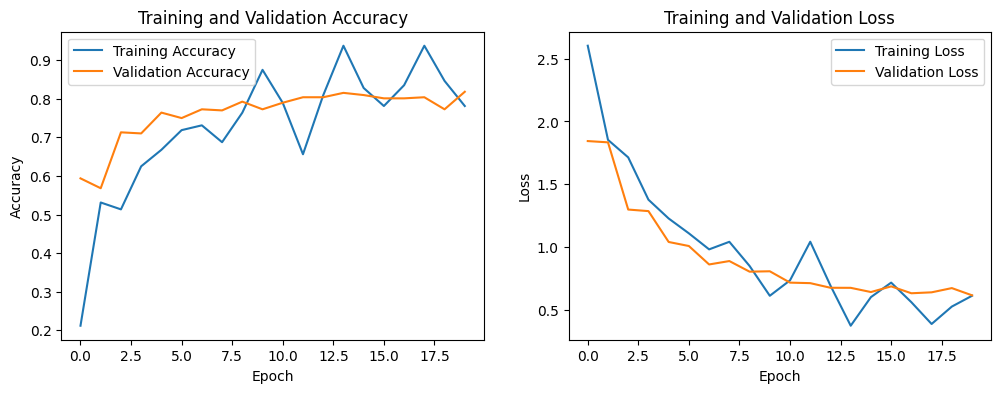

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))


    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
base_model.trainable = True
fine_tune_at = 100  

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs + 10  
)

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 61s 840ms/step - accuracy: 0.7676 - loss: 0.8099 - val_accuracy: 0.8295 - val_loss: 0.5744
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.8125 - loss: 0.5849 - val_accuracy: 0.8409 - val_loss: 0.5601
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 589ms/step - accuracy: 0.8177 - loss: 0.6678 - val_accuracy: 0.8125 - val_loss: 0.5696
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9062 - loss: 0.5552 - val_accuracy: 0.8097 - val_loss: 0.5929
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 593ms/step - accuracy: 0.8387 - loss: 0.5934 - val_accuracy: 0.8352 - val_loss: 0.5389
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.8125 - loss: 0.7332 - val_accuracy: 0.8295 - val_loss: 0.5722
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 853ms/step - accuracy: 0.8506 - loss: 0.5464 - val_accuracy: 0.8153 - val_loss: 0.5604
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.9062 - loss: 0.3262 - val_accurac

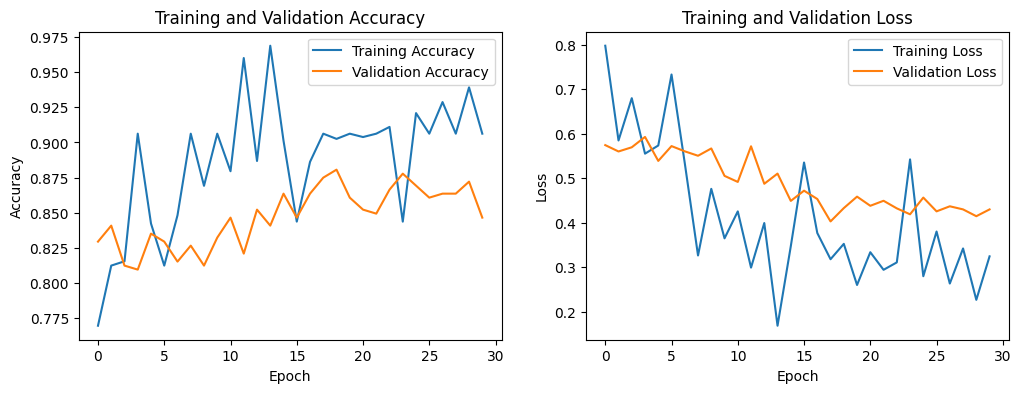

In [ ]:
plot_training_history(history_fine)

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 854ms/step - accuracy: 0.8772 - loss: 0.4077
Validation Accuracy: 87.99%


In [ ]:
model.save("animal_classification_model.h5")